In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
import os.path as osp
import gc
from dateutil.relativedelta import relativedelta
from tqdm import tqdm_notebook
import itertools 
import datetime

%matplotlib inline

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as py
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

pd.set_option('display.max_columns', 500)

In [3]:
flat_df = pd.read_csv('flat.csv', encoding='cp1251')
price_df = pd.read_csv('price.csv', encoding='cp1251')
status_df = pd.read_csv('status.csv', encoding='cp1251')
train_df = pd.read_csv('train.csv', encoding='cp1251')
test_df = pd.read_csv('test.csv')

In [216]:
VALID = True
TEST_START_DATE = pd.to_datetime('2018-02-01')

In [5]:
TARGET_COLS  = ['plan_l','plan_m', 'plan_s', 'start_square', 'value','vid_0', 'vid_1', 'vid_2']

In [6]:
train_df['id'] = train_df.bulk_id.astype(str)+'\\'+train_df.spalen.astype(str)
test_df['id'] = test_df.bulk_id.astype(str)+'\\'+test_df.spalen.astype(str)
flat_df['id'] = flat_df.id_bulk.astype(str)+'\\'+flat_df.spalen.astype(int).astype(str)

train_df['date1'] = pd.to_datetime(train_df['date1'])
test_df['date1'] = pd.to_datetime(test_df['date1'])
flat_df['sale'] = pd.to_datetime(flat_df['sale'])

## Parse flat sales

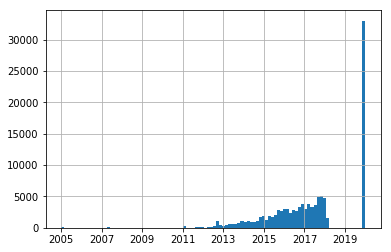

In [64]:
flat_df['sale'].hist(bins=100)

In [7]:
# min_date = flat_df['sale'].min()
min_date = datetime.datetime(year=2011, month=1, day=1)
# max_date = train_df['date1'].max()
max_date = datetime.datetime(year=2018, month=5, day=1)
dates = [min_date+relativedelta(months=m) 
         for m in itertools.takewhile(lambda m: min_date+relativedelta(months=m)<max_date+relativedelta(months=1), range(200))]
dates+=[flat_df['sale'].max()]

In [8]:
sales = dict()
for idx, set_df in tqdm_notebook(flat_df.groupby('id')):
    sales[idx] = {str(datetime.datetime(year=date.year, month=date.month, day=1)):{l:[] for l in ['-1','s','m','l'] }
                  for date in dates}
    for _, row in set_df.iterrows():
        sqr, sale_date, plan = row['square'], row['sale'], row['plan_size']
        key = str(datetime.datetime(year=sale_date.year, month=sale_date.month, day=1))
        if key in sales[idx]:
            sales[idx][key][plan.lower()].append(sqr)

In [9]:
data = []
for idx in sales:
    for date in sales[idx]:
        sale_date = pd.to_datetime(date)
        data_row = [sales[idx][date][l] for l in ['-1','s','m','l']]
        data.append([idx,sale_date]+data_row)
sales_df = pd.DataFrame(data, columns = ['id','date1','plan_-1_sales','plan_s_sales','plan_m_sales','plan_l_sales'])

In [10]:
sales_df

id      date1 plan_-1_sales  \
0      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-01-01            []   
1      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-02-01            []   
2      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-03-01            []   
3      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-04-01            []   
4      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-05-01            []   
5      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-06-01            []   
6      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-07-01            []   
7      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-08-01            []   
8      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-09-01            []   
9      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-10-01            []   
10     01778D74-9326-E711-96FE-001EC9D5643C\0 2011-11-01            []   
11     01778D74-9326-E711-96FE-001EC9D5643C\0 2011-12-01            []   
12     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-01-01            []   
13     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-02-01            []   
14     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-03-01            []   
15     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-04-01            []   
16     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-05-01            []   
17     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-06-01            []   
18     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-07-01            []   
19     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-08-01            []   
20     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-09-01            []   
21     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-10-01            []   
22     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-11-01            []   
23     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-12-01            []   
24     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-01-01            []   
25     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-02-01            []   
26     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-03-01            []   
27     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-04-01            []   
28     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-05-01            []   
29     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-06-01            []   
...                                       ...        ...           ...   
93570  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-01-01            []   
93571  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-02-01            []   
93572  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-03-01            []   
93573  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-04-01            []   
93574  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-05-01            []   
93575  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-06-01            []   
93576  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-07-01            []   
93577  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-08-01            []   
93578  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-09-01            []   
93579  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-10-01            []   
93580  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-11-01            []   
93581  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-12-01            []   
93582  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-01-01            []   
93583  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-02-01            []   
93584  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-03-01            []   
93585  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-04-01            []   
93586  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-05-01            []   
93587  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-06-01            []   
93588  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-07-01            []   
93589  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-08-01            []   
93590  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-09-01            []   
93591  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-10-01            []   
93592  FF3814A9-9F7D-E711-8530-00505688958B\3 2

In [11]:
for col in ['plan_-1_sales','plan_s_sales','plan_m_sales','plan_l_sales']:
    sales_df['_'.join(col.split('_')[:-1]+['value'])] = sales_df[col].apply(np.sum)
    sales_df['_'.join(col.split('_')[:-1]+['sold'])] = sales_df[col].apply(len)
    
    mean_square = sales_df.groupby('id')[col].apply(lambda x: np.hstack(x.values).mean())
    sales_df = sales_df.merge(mean_square.rename('_'.join(col.split('_')[:-1]+['mean_square'])).reset_index(),
                              on='id', how='left')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

Mean of empty slice.

/home/ubuntu/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars



In [12]:
sales_df

id      date1 plan_-1_sales  \
0      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-01-01            []   
1      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-02-01            []   
2      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-03-01            []   
3      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-04-01            []   
4      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-05-01            []   
5      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-06-01            []   
6      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-07-01            []   
7      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-08-01            []   
8      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-09-01            []   
9      01778D74-9326-E711-96FE-001EC9D5643C\0 2011-10-01            []   
10     01778D74-9326-E711-96FE-001EC9D5643C\0 2011-11-01            []   
11     01778D74-9326-E711-96FE-001EC9D5643C\0 2011-12-01            []   
12     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-01-01            []   
13     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-02-01            []   
14     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-03-01            []   
15     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-04-01            []   
16     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-05-01            []   
17     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-06-01            []   
18     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-07-01            []   
19     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-08-01            []   
20     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-09-01            []   
21     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-10-01            []   
22     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-11-01            []   
23     01778D74-9326-E711-96FE-001EC9D5643C\0 2012-12-01            []   
24     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-01-01            []   
25     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-02-01            []   
26     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-03-01            []   
27     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-04-01            []   
28     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-05-01            []   
29     01778D74-9326-E711-96FE-001EC9D5643C\0 2013-06-01            []   
...                                       ...        ...           ...   
93570  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-01-01            []   
93571  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-02-01            []   
93572  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-03-01            []   
93573  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-04-01            []   
93574  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-05-01            []   
93575  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-06-01            []   
93576  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-07-01            []   
93577  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-08-01            []   
93578  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-09-01            []   
93579  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-10-01            []   
93580  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-11-01            []   
93581  FF3814A9-9F7D-E711-8530-00505688958B\3 2016-12-01            []   
93582  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-01-01            []   
93583  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-02-01            []   
93584  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-03-01            []   
93585  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-04-01            []   
93586  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-05-01            []   
93587  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-06-01            []   
93588  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-07-01            []   
93589  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-08-01            []   
93590  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-09-01            []   
93591  FF3814A9-9F7D-E711-8530-00505688958B\3 2017-10-01            []   
93592  FF3814A9-9F7D-E711-8530-00505688958B\3 2

In [13]:
sales_df['flat_df_value'] = sales_df[['plan_-1_value','plan_s_value','plan_m_value','plan_l_value']].sum(axis=1)

In [14]:
train_df.shape

(8726, 56)

In [15]:
match_val = train_df.merge(sales_df.drop(columns=['plan_-1_sales','plan_s_sales','plan_m_sales','plan_l_sales']),
                                   on=['id','date1'], how='left')[['value','flat_df_value']]

In [16]:
train_df = train_df[~(np.abs(match_val['value']-match_val['flat_df_value'])>1)]
train_df.shape

(8718, 56)

In [17]:
df = pd.concat([train_df, test_df])[train_df.columns]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [18]:
df = df.merge(sales_df.drop(columns=['plan_-1_sales','plan_s_sales','plan_m_sales','plan_l_sales','flat_df_value']),
                                   on=['id','date1'], how='left')

In [19]:
value_from_means = sum([df['plan_{}_sold'.format(s)]*df['plan_{}_mean_square'.format(s)].fillna(0) for s in ['-1','s','m','l']])
np.sqrt(np.mean((df['value'] - value_from_means).dropna()**2))

4.867107741092594

In [20]:
TARGET_COLS +=['plan_-1_value', 'plan_-1_sold','plan_s_value', 'plan_s_sold', 
'plan_m_value','plan_m_sold', 'plan_l_value', 'plan_l_sold']

In [21]:
# df['id'] = df.bulk_id.astype(str)+'\\'+df.spalen.astype(str)
df = df.merge(df.groupby('id')['month_cnt'].min().rename('month_sale_start').reset_index(),
               on='id', how='left')
df['months_after_start'] = df['month_cnt'] - df['month_sale_start']

In [22]:
# TODO: features from "future" for test part
def unroll_history(df, target_cols=TARGET_COLS, months_before = 3, months_forward = 3):

    out_df = []
    for _, set_df in tqdm_notebook(df.groupby('id')):
        min_date, max_date = set_df.date1.min(), set_df.date1.max()
        dates = [min_date+relativedelta(months=m) 
                 for m in itertools.takewhile(lambda m: min_date+relativedelta(months=m)<max_date, range(36))]
        train_dates = list(filter(lambda d: d < TEST_START_DATE, dates))
        set_df = set_df.set_index('date1').sort_index()
        
        unrolled_df =[]
        for date in (train_dates+[TEST_START_DATE]):
            data_df = []
            for m in range(months_forward):
                dt = date+relativedelta(months=m)
                if dt not in set_df.index:
                    continue
                row = set_df.loc[dt].copy()
                row['months_forward'] = m
                row['base_date'] = date 
                data_df.append(row)

            past_targets = []
            for m in range(1,months_before+1):
                dt = date-relativedelta(months=m)
                if dt in set_df.index:
                    to_append = set_df.loc[dt][target_cols]
                else:
                    to_append = pd.Series(index=target_cols)
                to_append = to_append.rename(lambda s: s+'/'+ str(m)+'_months_before')
                past_targets.append(to_append)
            past_targets = pd.concat(past_targets, axis=0)
            if len(data_df) != 0:
                data_df = pd.concat([pd.concat([s,past_targets] )for s in data_df], axis=1).T
                data_df['base_date'] = pd.to_datetime(data_df['base_date'])
                unrolled_df.append(data_df)
        if len(unrolled_df)!= 0:
            out_df.append(pd.concat(unrolled_df))
    return pd.concat(out_df)
unrolled_df = unroll_history(df)

In [217]:
if VALID :
    train_data = unrolled_df[unrolled_df.base_date <= pd.to_datetime('2017-10-01')]
    test_data = unrolled_df[(unrolled_df.base_date > pd.to_datetime('2017-10-01')) &
                            (unrolled_df.base_date <= pd.to_datetime('2018-01-01'))]
else:
    train_data = unrolled_df[unrolled_df.base_date <= pd.to_datetime('2018-01-01')]
    test_data = unrolled_df[unrolled_df.base_date > pd.to_datetime('2018-01-01')]

In [218]:
PLAN_PREFIX = ['plan_-1','plan_s','plan_m','plan_l']
def melt_by_plan(data, plan_prefix = PLAN_PREFIX):
    plan_cols = list(filter(lambda c: sum([pref in c for pref in plan_prefix])>0,data.columns))
    nonplan_cols = list(filter(lambda c: c not in plan_cols,data.columns))

    melted = []
    for plan in plan_prefix:
        curr_plan_cols = list(filter(lambda s: plan in s, plan_cols))
        curr_plan_df = data[curr_plan_cols]
        curr_plan_df= curr_plan_df.rename(mapper =lambda c: c.replace(plan,'flats'), axis=1)
        curr_plan_df['plan_size'] = plan
        melted.append(pd.concat([data[nonplan_cols], curr_plan_df],axis=1))
    return pd.concat(melted)

In [219]:
train_data = melt_by_plan(train_data).reset_index(drop=True)
test_data = melt_by_plan(test_data).reset_index(drop=True)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [220]:
train_data = train_data[~train_data['flats_mean_square'].isna()]
test_data = test_data[~test_data['flats_mean_square'].isna()]

In [221]:
TARGET_COLS  = ['flats', 'flats_sold', 'flats_value', 'start_square', 'value','vid_0', 'vid_1', 'vid_2']

In [222]:
target_cols = TARGET_COLS
nontarget_cols = [c for c in train_data.columns if c not in target_cols]

In [223]:
if VALID:
    test_data = test_data.loc[
        test_data[target_cols].dropna(axis=0).index]

train_data = train_data.loc[
    train_data[target_cols].dropna(axis=0).index]

In [224]:
X_train = train_data[nontarget_cols]
y_train = train_data[target_cols]

X_test = test_data[nontarget_cols]
y_test = test_data[target_cols]

# Train LightGBM

In [225]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [226]:
categorical = ['Лифт', 'Кондиционирование', 'Огорожена территория',
       'Подземная парковка', 'ФОК', 'Кладовые', 'Система мусоротведения',
       'Автомойка', 'Двор без машин', 'Колясочные','Класс объекта',
       'Спортивная площадка', 'Входные группы']
key_category = ['bulk_id', 'spalen','plan_size']
to_drop = ['month','month_sale_start','month_cnt', 'id']

target_col = 'flats_sold'
# target_col = 'flats_value'

In [227]:
X_train = X_train.fillna(-1).drop(columns=to_drop)
X_test = X_test.fillna(-1).drop(columns=to_drop)

In [228]:
tmp = pd.concat([X_train, X_test])
for col in categorical:
    le = LabelEncoder()
    le.fit(tmp[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

key_encoder = dict()   
for col in key_category:
    le = LabelEncoder()
    le.fit(tmp[col])
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    key_encoder[col]=le
    
# categorical+=key_category
categorical+=['spalen']

In [229]:
lgb_train = lgb.Dataset(X_train.drop(columns=['bulk_id','base_date']), y_train[target_col],
                        weight=X_train['flats_mean_square']
                        ,free_raw_data=False)
if VALID:
    lgb_eval = lgb.Dataset(X_test.drop(columns=['bulk_id','base_date']), y_test[target_col], 
                           weight=X_test['flats_mean_square']
                           ,reference=lgb_train, free_raw_data=False)

In [230]:
def eval_model():
    val_df = pd.concat([X_test, y_test], axis=1)
    val_df['pred']= gbm.predict(X_test.drop(columns=['bulk_id', 'base_date']))
    if target_col == 'flats_sold':
        val_df['pred']= val_df['pred']*val_df['flats_mean_square']
    elif target_col == 'flats_value':
        pass
    else:
        raise Exception()
    value = val_df.groupby(['bulk_id','spalen','base_date','months_forward'])['value'].max()
    pred_value = val_df.groupby(['bulk_id','spalen','base_date','months_forward'])['pred'].sum()
    print('RMSE: ', np.sqrt(np.mean((value-pred_value)**2)))
    
def rmse(preds, train_data):
    labels = train_data.get_label()
    return 'rmse', np.sqrt(np.mean((labels - preds)**2)), False

params = {
    'boosting_type': 'gbdt',
    'objective': 'poisson',
    'metric': 'poisson',
    'num_leaves': 200,
    'learning_rate': 0.05,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 6,
}
if VALID:
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=10000,
                    early_stopping_rounds = 5,
                    valid_sets=lgb_eval, 
                    categorical_feature=categorical,
                   verbose_eval=50)
    eval_model()
    
else:
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=lgb_train, 
                categorical_feature=categorical,
               verbose_eval=50)


/home/ubuntu/.local/lib/python3.6/site-packages/lightgbm/basic.py:1038: UserWarning:

categorical_feature in Dataset is overridden. New categorical_feature is ['spalen', 'Автомойка', 'Входные группы', 'Двор без машин', 'Кладовые', 'Класс объекта', 'Колясочные', 'Кондиционирование', 'Лифт', 'Огорожена территория', 'Подземная парковка', 'Система мусоротведения', 'Спортивная площадка', 'ФОК']

/home/ubuntu/.local/lib/python3.6/site-packages/lightgbm/basic.py:681: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 5 rounds.
[50]	valid_0's poisson: -0.78705
[100]	valid_0's poisson: -0.977094
[150]	valid_0's poisson: -1.03372
[200]	valid_0's poisson: -1.06099
[250]	valid_0's poisson: -1.07955
[300]	valid_0's poisson: -1.09533
[350]	valid_0's poisson: -1.1069
[400]	valid_0's poisson: -1.11674
[450]	valid_0's poisson: -1.12365
[500]	valid_0's poisson: -1.12827
Early stopping, best iteration is:
[537]	valid_0's poisson: -1.13229
RMSE:  170.5511177225586


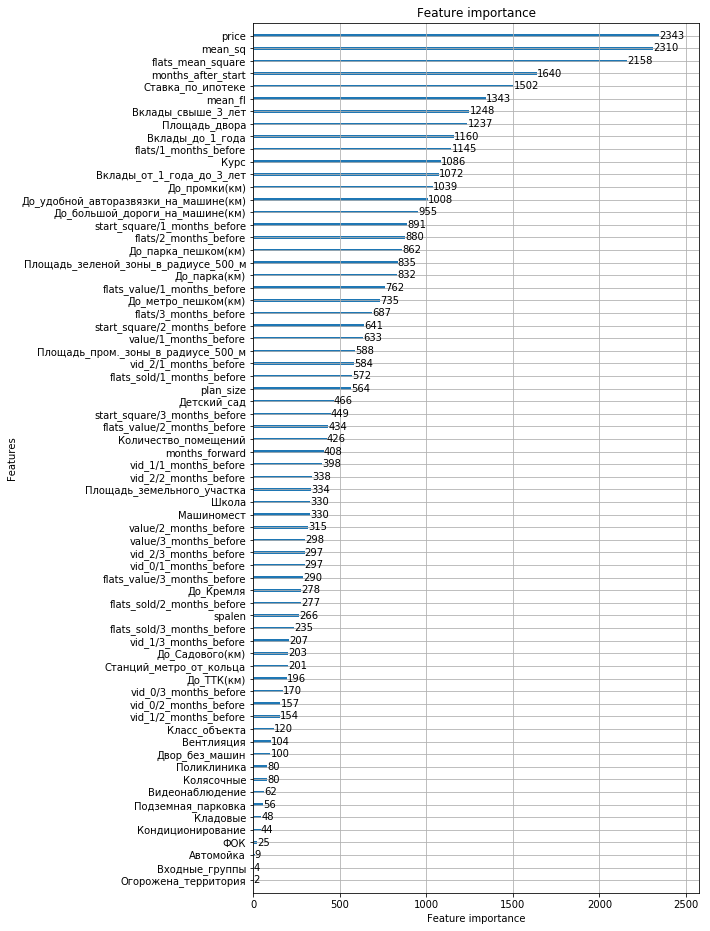

In [214]:
lgb.plot_importance(gbm, figsize=(8,16))

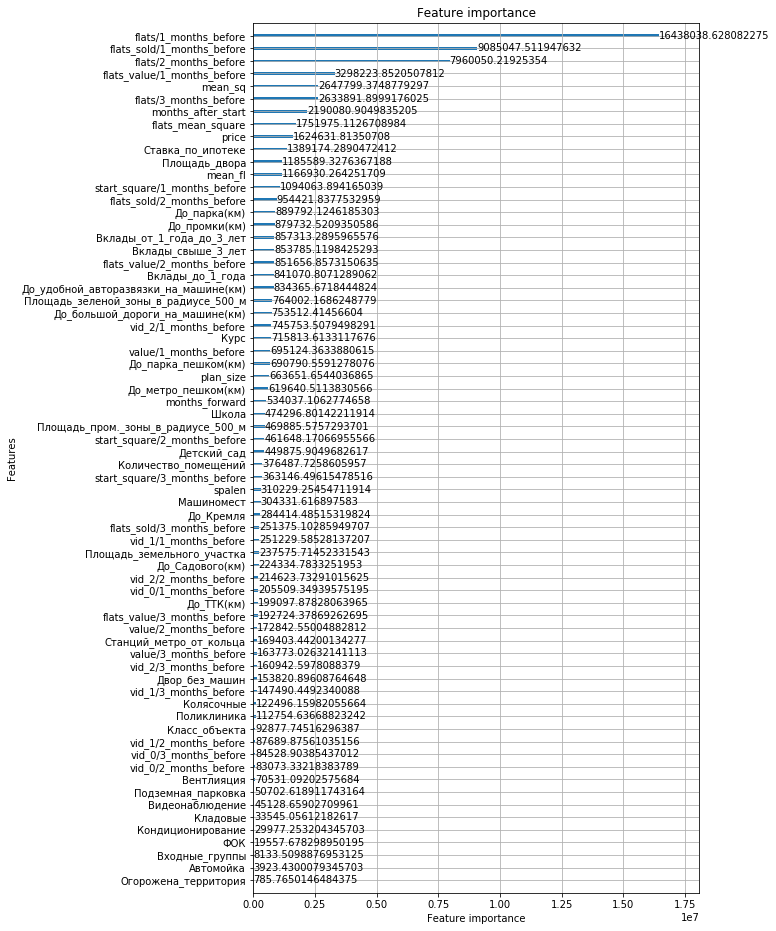

In [215]:
lgb.plot_importance(gbm, figsize=(8,16), importance_type='gain')

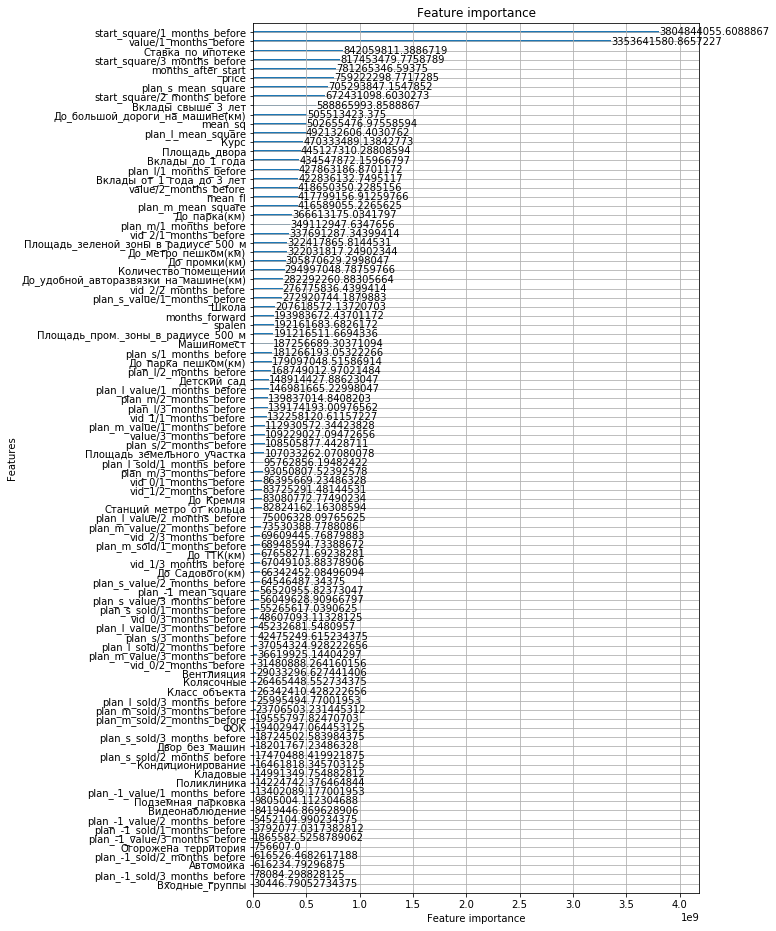

In [337]:
lgb.plot_importance(gbm, figsize=(8,16), importance_type='gain')

# Submit

In [190]:
submis = X_test.copy()
submis['value']= gbm.predict(X_test.drop(columns=['bulk_id','base_date']))
for col in key_category:
    submis[col] = key_encoder[col].inverse_transform(submis[col])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [191]:
if target_col == 'flats_sold':
    submis['value']= submis['value']*submis['flats_mean_square']
elif target_col == 'flats_value':
    pass
else:
    raise Exception()
pred_value = submis.groupby(['bulk_id','spalen','base_date','months_forward'])['value'].sum()

In [192]:
submis= pred_value.reset_index()

In [193]:
submis['months_forward'] = submis.months_forward.\
    apply(lambda m: (pd.to_datetime('2018-02-01')+relativedelta(months=m)).strftime("%Y-%m-%d"))

In [194]:
test_df['date1'] =test_df['date1'].apply(lambda d: pd.to_datetime(d).strftime("%Y-%m-%d"))

In [195]:
submis = test_df[['bulk_id', 'spalen', 'date1']].merge(submis[['bulk_id', 'spalen', 'months_forward','value']],
              left_on=['bulk_id', 'spalen', 'date1'],
                right_on = ['bulk_id', 'spalen', 'months_forward'], how='left')

In [196]:
submis['value'].reset_index().rename(columns={'index':'id'}).to_csv('baseline_flats_144it.csv',index=False)

In [231]:
submis['value'][submis['value']<0]

150     -3.232497
281     -1.968644
745     -1.397166
774     -1.262170
803     -0.061348
821     -3.837626
847     -2.791719
875     -3.869924
1310    -2.164240
1324    -2.029244
1338    -1.949912
1383   -10.280507
1619    -2.372628
1636    -2.525218
1717    -5.896473
1721    -2.515497
1737    -4.721861
1741    -2.245310
Name: value, dtype: float64

In [142]:
submis['value']

0        892.334289
1       1328.755882
2        139.757426
3        558.594716
4        887.186587
5       1370.274514
6        134.112727
7        614.690781
8        954.709061
9       1388.679691
10       148.688023
11       669.873815
12       447.095460
13       286.254212
14       174.768705
15       481.138917
16        35.699370
17        33.693458
18        32.195780
19        61.269120
20        46.335019
21       323.966278
22       304.047719
23       364.689592
24       637.874851
25        44.307570
26       408.753595
27       165.572509
28        92.034127
29       124.837855
           ...     
1740     175.085016
1741      21.601149
1742     149.456589
1743     385.910579
1744     615.002308
1745     408.134502
1746     112.382354
1747     229.673623
1748      63.756001
1749      73.658617
1750      28.728558
1751     138.191855
1752    1098.038057
1753     997.705563
1754     670.494890
1755      37.574617
1756      56.545085
1757      17.764839
1758      86.391882


In [198]:
submis['value']

0        967.251544
1       1661.228548
2        158.147707
3        545.792816
4       1035.961441
5       1688.398215
6        186.194926
7        642.693493
8       1109.322477
9       1731.131455
10       203.135898
11       668.088244
12       468.821321
13       384.390250
14       231.059021
15       515.699924
16        29.639647
17        24.693254
18        18.902843
19        99.080719
20        42.410097
21       311.583325
22       354.418033
23       394.097815
24       684.040648
25        42.932577
26       519.239282
27       183.960441
28       118.785863
29       185.296338
           ...     
1740     188.259256
1741      -2.245310
1742     216.833480
1743     505.680559
1744     884.755206
1745     538.498736
1746     119.658779
1747     290.449550
1748      36.586046
1749      85.635222
1750      37.354197
1751     133.549025
1752    1144.132182
1753     959.015348
1754     808.229267
1755      29.534432
1756      76.158639
1757       3.266806
1758      89.715916
